### Cleaning and sanitizing the Sample Superstore data

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load dataset
store_data = pd.read_excel(r'C:\Users\JINCY\Desktop\Study Material\DSA\TCS internship\datasets\sample superstore\Sample - Superstore (2).xls')

In [3]:
pd.set_option('display.max_columns', None)

#### Study the dataset

In [4]:
# display the data
store_data

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,Florida,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [5]:
# size of the dataset
store_data.shape

(9994, 21)

Dataset contains 9994 rows and 21 columns.

In [6]:
# info about data
store_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

The columns are mix of datetime, float, int and object datatype.

In [7]:
# display column names
store_data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [8]:
# check number of unique values of Row ID column
store_data['Row ID'].nunique()

9994

#### Handling inconsistent , irrelevant and duplicate values

The Row ID column is an identifier and doesn't contribute to model building. Hence it can be dropped.

In [9]:
# drop row id
clean_store_data = store_data.drop('Row ID', axis=1)

In [10]:
clean_store_data

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,Florida,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [11]:
# change datatype of postal code to object
clean_store_data['Postal Code'] = clean_store_data['Postal Code'].astype('object')

In [12]:
clean_store_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       9994 non-null   object        
 1   Order Date     9994 non-null   datetime64[ns]
 2   Ship Date      9994 non-null   datetime64[ns]
 3   Ship Mode      9994 non-null   object        
 4   Customer ID    9994 non-null   object        
 5   Customer Name  9994 non-null   object        
 6   Segment        9994 non-null   object        
 7   Country        9994 non-null   object        
 8   City           9994 non-null   object        
 9   State          9994 non-null   object        
 10  Postal Code    9994 non-null   object        
 11  Region         9994 non-null   object        
 12  Product ID     9994 non-null   object        
 13  Category       9994 non-null   object        
 14  Sub-Category   9994 non-null   object        
 15  Product Name   9994 n

In [13]:
# display summary statistics
clean_store_data.describe()

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


-ve value in Profit indicating loss.

In [14]:
# object columns summary statistics
clean_store_data.describe(include='O')

,Order ID,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name
count,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994
unique,5009,4,793,793,3,1,531,49,631,4,1862,3,17,1850
top,CA-2017-100111,Standard Class,WB-21850,William Brown,Consumer,United States,New York City,California,10035,West,OFF-PA-10001970,Office Supplies,Binders,Staple envelope
freq,14,5968,37,37,5191,9994,915,2001,263,3203,19,6026,1523,48


In [15]:
# check for null values 
clean_store_data.isna().sum()

Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

There are no null values in the dataset.

In [16]:
# check for any duplicated values
clean_store_data.duplicated().sum()

1

In [17]:
clean_store_data[clean_store_data.duplicated()]

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
3406,US-2014-150119,2014-04-23,2014-04-27,Standard Class,LB-16795,Laurel Beltran,Home Office,United States,Columbus,Ohio,43229,East,FUR-CH-10002965,Furniture,Chairs,Global Leather Highback Executive Chair with P...,281.372,2,0.3,-12.0588


In [18]:
#locate the duplicate row
clean_store_data[3400:3410]

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
3400,CA-2014-102274,2014-11-21,2014-11-26,Standard Class,DH-13075,Dave Hallsten,Corporate,United States,Richmond,Kentucky,40475,South,OFF-ST-10001511,Office Supplies,Storage,Space Solutions Commercial Steel Shelving,193.950,3,0.0,9.6975
3401,CA-2014-102274,2014-11-21,2014-11-26,Standard Class,DH-13075,Dave Hallsten,Corporate,United States,Richmond,Kentucky,40475,South,OFF-AR-10002833,Office Supplies,Art,Newell 322,5.460,3,0.0,1.4742
3402,CA-2015-129700,2015-05-04,2015-05-05,First Class,LA-16780,Laura Armstrong,Corporate,United States,Tinley Park,Illinois,60477,Central,FUR-FU-10001940,Furniture,Furnishings,Staple-based wall hangings,22.288,7,0.6,-8.9152
3403,CA-2017-168739,2017-05-29,2017-06-05,Standard Class,HZ-14950,Henia Zydlo,Consumer,United States,Houston,Texas,77095,Central,FUR-FU-10003919,Furniture,Furnishings,Eldon Executive Woodline II Cherry Finish Desk...,65.424,4,0.6,-52.3392
3404,CA-2015-152527,2015-10-17,2015-10-17,Same Day,CM-12190,Charlotte Melton,Consumer,United States,Los Angeles,California,90004,West,OFF-ST-10003479,Office Supplies,Storage,"Eldon Base for stackable storage shelf, platinum",77.880,2,0.0,3.8940
3405,US-2014-150119,2014-04-23,2014-04-27,Standard Class,LB-16795,Laurel Beltran,Home Office,United States,Columbus,Ohio,43229,East,FUR-CH-10002965,Furniture,Chairs,Global Leather Highback Executive Chair with P...,281.372,2,0.3,-12.0588
3406,US-2014-150119,2014-04-23,2014-04-27,Standard Class,LB-16795,Laurel Beltran,Home Office,United States,Columbus,Ohio,43229,East,FUR-CH-10002965,Furniture,Chairs,Global Leather Highback Executive Chair with P...,281.372,2,0.3,-12.0588
3407,US-2014-150119,2014-04-23,2014-04-27,Standard Class,LB-16795,Laurel Beltran,Home Office,United States,Columbus,Ohio,43229,East,OFF-BI-10000145,Office Supplies,Binders,Zipper Ring Binder Pockets,7.488,8,0.7,-5.2416
3408,US-2014-150119,2014-04-23,2014-04-27,Standard Class,LB-16795,Laurel Beltran,Home Office,United States,Columbus,Ohio,43229,East,FUR-FU-10002191,Furniture,Furnishings,G.E. Halogen Desk Lamp Bulbs,22.336,4,0.2,7.8176
3409,US-2017-150847,2017-04-30,2017-05-06,Standard Class,JF-15490,Jeremy Farry,Consumer,United States,Columbus,Ohio,43229,East,OFF-PA-10004451,Office Supplies,Paper,Xerox 222,10.368,2,0.2,3.6288


In [19]:
# drop duplicate row
clean_store_data.drop_duplicates(inplace=True)

In [20]:
clean_store_data.shape

(9993, 20)

In [21]:
clean_store_data.columns

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [22]:
# drop all the columns that do not contribute to forecasting

clean_store_data1 = clean_store_data.drop(['Order ID','Customer ID','Customer Name','Postal Code','Product ID','Product Name'], axis=1)

In [23]:
clean_store_data1

,Order Date,Ship Date,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,2016-11-08,2016-11-11,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,2016-11-08,2016-11-11,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,2016-06-12,2016-06-16,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,2015-10-11,2015-10-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,2015-10-11,2015-10-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,2014-01-21,2014-01-23,Second Class,Consumer,United States,Miami,Florida,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,2017-02-26,2017-03-03,Standard Class,Consumer,United States,Costa Mesa,California,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,2017-02-26,2017-03-03,Standard Class,Consumer,United States,Costa Mesa,California,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,2017-02-26,2017-03-03,Standard Class,Consumer,United States,Costa Mesa,California,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


#### Addition of new columns

In [24]:
# create Cost column from sales and profit
clean_store_data1['Cost'] = clean_store_data1['Sales'] - clean_store_data1['Profit']

In [25]:
# extract year, month from order date and shipment date
clean_store_data1['Order Year'] = clean_store_data1['Order Date'].dt.year
clean_store_data1['Order Month'] = clean_store_data1['Order Date'].dt.month
clean_store_data1['Ship Year'] = clean_store_data1['Ship Date'].dt.year
clean_store_data1['Ship Month'] = clean_store_data1['Ship Date'].dt.month

In [26]:
# cleaned data
clean_store_data1

,Order Date,Ship Date,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Cost,Order Year,Order Month,Ship Year,Ship Month
0,2016-11-08,2016-11-11,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,220.0464,2016,11,2016,11
1,2016-11-08,2016-11-11,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820,512.3580,2016,11,2016,11
2,2016-06-12,2016-06-16,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714,7.7486,2016,6,2016,6
3,2015-10-11,2015-10-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310,1340.6085,2015,10,2015,10
4,2015-10-11,2015-10-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164,19.8516,2015,10,2015,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,2014-01-21,2014-01-23,Second Class,Consumer,United States,Miami,Florida,South,Furniture,Furnishings,25.2480,3,0.20,4.1028,21.1452,2014,1,2014,1
9990,2017-02-26,2017-03-03,Standard Class,Consumer,United States,Costa Mesa,California,West,Furniture,Furnishings,91.9600,2,0.00,15.6332,76.3268,2017,2,2017,3
9991,2017-02-26,2017-03-03,Standard Class,Consumer,United States,Costa Mesa,California,West,Technology,Phones,258.5760,2,0.20,19.3932,239.1828,2017,2,2017,3
9992,2017-02-26,2017-03-03,Standard Class,Consumer,United States,Costa Mesa,California,West,Office Supplies,Paper,29.6000,4,0.00,13.3200,16.2800,2017,2,2017,3


### Exploratory Data Analysis

In [27]:
# check the number of unique values
clean_store_data1.nunique()

Order Date      1237
Ship Date       1334
Ship Mode          4
Segment            3
Country            1
City             531
State             49
Region             4
Category           3
Sub-Category      17
Sales           6144
Quantity          14
Discount          12
Profit          7545
Cost            6854
Order Year         4
Order Month       12
Ship Year          5
Ship Month        12
dtype: int64

#### Univariate Analysis

In [28]:
clean_store_data1['Order Year'].value_counts()

2017    3312
2016    2587
2015    2102
2014    1992
Name: Order Year, dtype: int64

##### Total Orders by Year, Month and Day of the Week

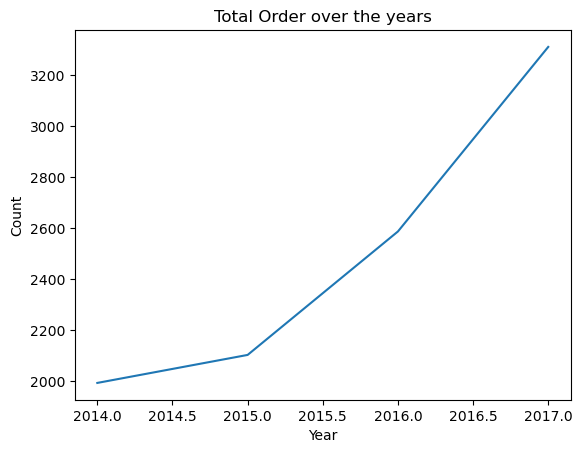

In [29]:
## find the total number of orders over the years
sns.lineplot(clean_store_data1['Order Year'].value_counts().sort_index())
plt.title('Total Order over the years')
plt.xlabel('Year')
plt.ylabel("Count")
plt.show()


Total number of orders have increased over the years.

In [30]:
clean_store_data1['Order Month'].value_counts()

11    1471
12    1408
9     1383
10     819
5      735
6      717
7      710
8      706
3      696
4      667
1      381
2      300
Name: Order Month, dtype: int64

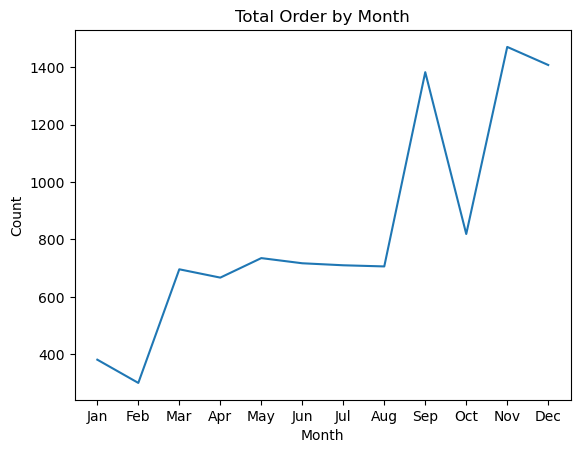

In [31]:
## find the total number of orders by month
sns.lineplot(clean_store_data1['Order Month'].value_counts().sort_index())
plt.title('Total Order by Month')
plt.xticks(range(1,13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.xlabel('Month')
plt.ylabel("Count")
plt.show()

Holiday season - November , December has the highest number of orders.

In [32]:
np.sort(clean_store_data1['Order Year'].unique())

array([2014, 2015, 2016, 2017], dtype=int64)

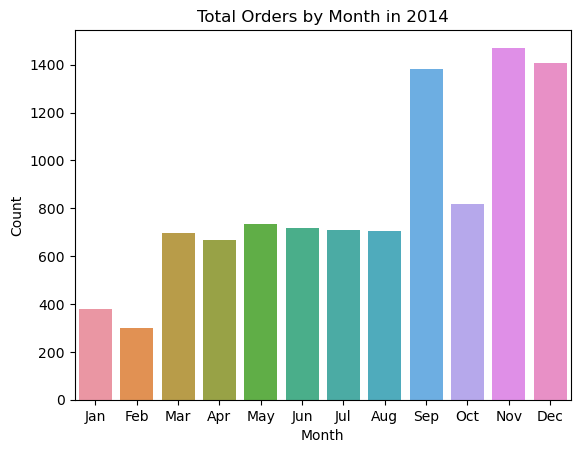

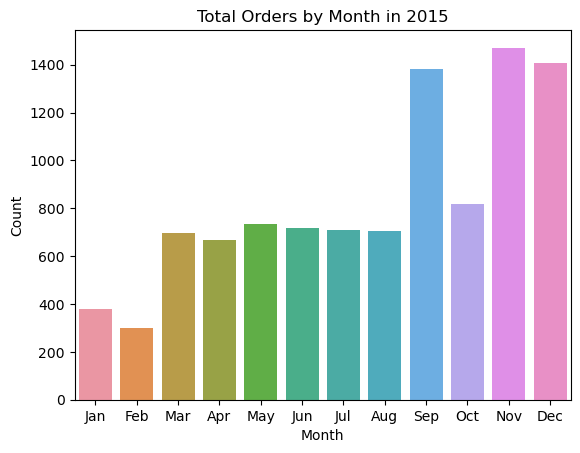

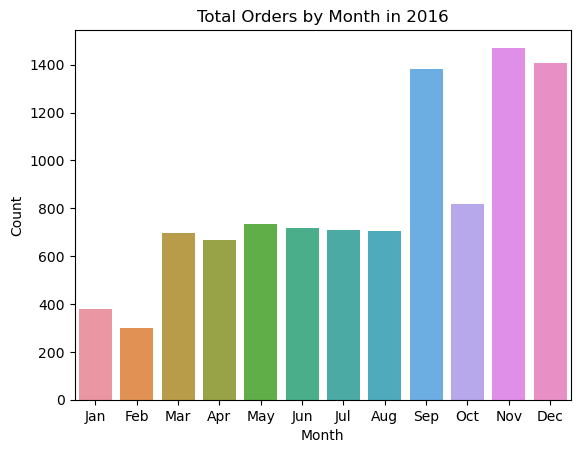

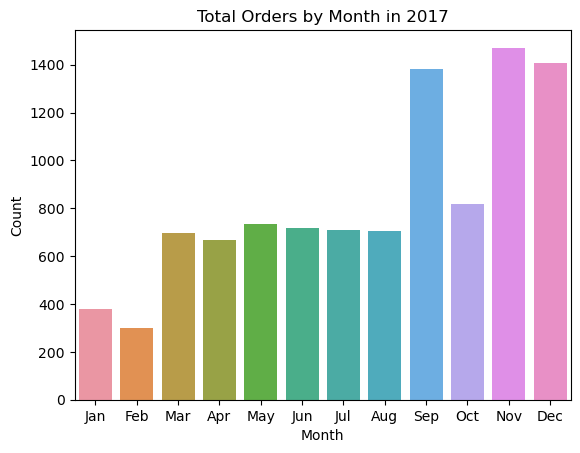

In [33]:
# plot total orders by month for each year
years = np.sort(clean_store_data1['Order Year'].unique())

# Loop over the years and plot the number of orders by month for each year
for year in years:
    data = clean_store_data1[clean_store_data1['Order Year'] == year]
    plt.figure()
    sns.countplot(x='Order Month', data=clean_store_data1)
    plt.title(f"Total Orders by Month in {year}")
    plt.xlabel("Month")
    plt.ylabel("Count")
    plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    plt.show()

The orders follow a similar pattern in each year. There are less number of orders in the beginning of the year and then it gradually increases.

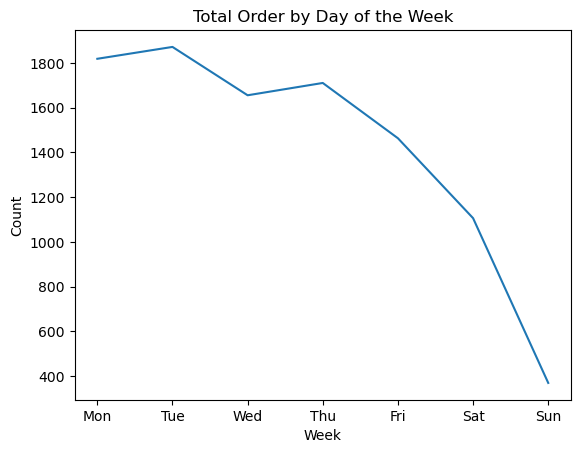

In [34]:
# find the total number of orders by day of the week

# create Day of the week column
clean_store_data1['Order_Week'] = clean_store_data1['Order Date'].dt.day_name()
sns.lineplot(clean_store_data1['Order_Week'].value_counts().sort_index())
plt.title('Total Order by Day of the Week')
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.xlabel('Week')
plt.ylabel("Count")
plt.show()

Mondays and Tuesdays seems to have very high count of orders.

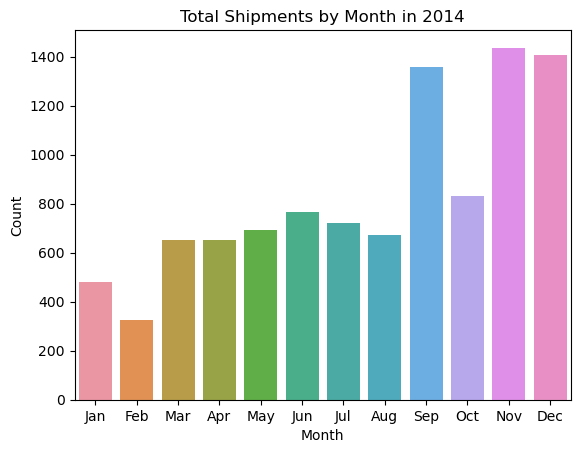

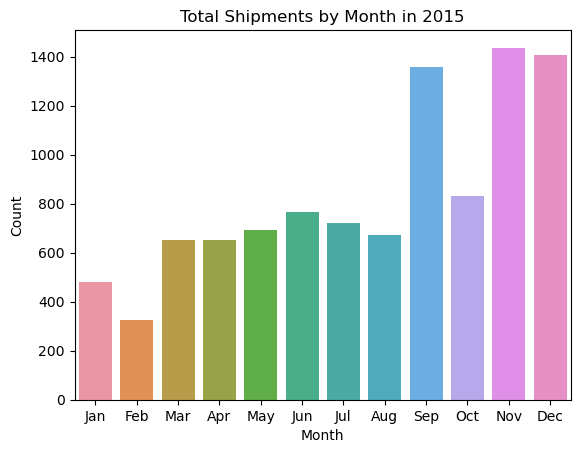

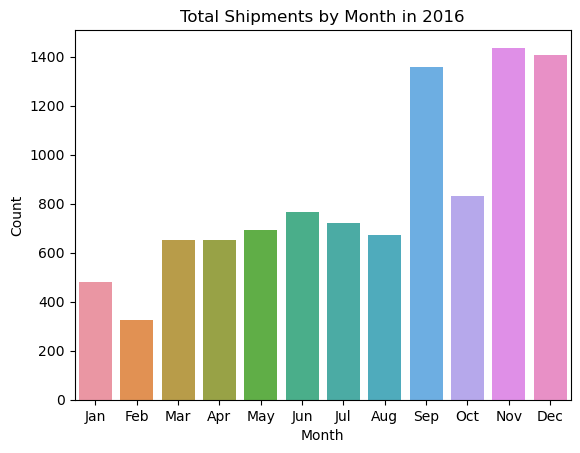

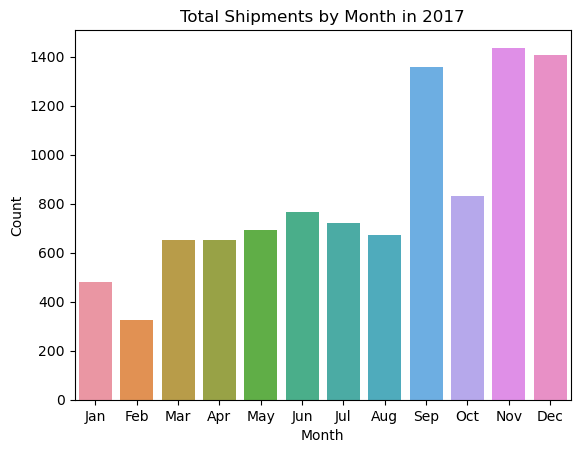

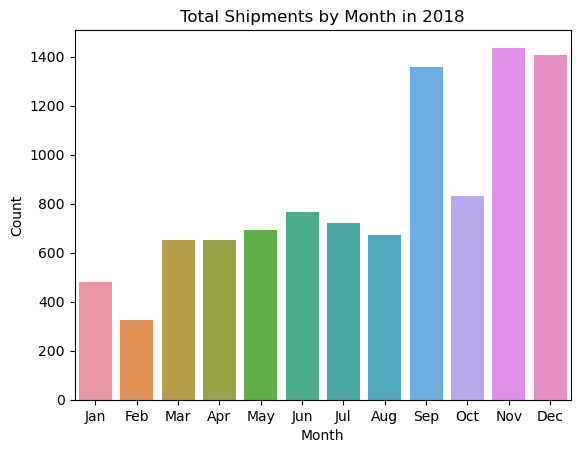

In [35]:
# plot total shipments by month for each year
years = np.sort(clean_store_data1['Ship Year'].unique())

# Loop over the years and plot the number of shipments by month for each year
for year in years:
    data = clean_store_data1[clean_store_data1['Ship Year'] == year]
    plt.figure()
    sns.countplot(x='Ship Month', data=clean_store_data1)
    plt.title(f"Total Shipments by Month in {year}")
    plt.xlabel("Month")
    plt.ylabel("Count")
    plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    plt.show()

Total number of Shipments by month follow a similar pattern as that of Orders.

##### Distribution of Customer Segment

In [36]:
clean_store_data1['Segment'].value_counts()

Consumer       5191
Corporate      3020
Home Office    1782
Name: Segment, dtype: int64

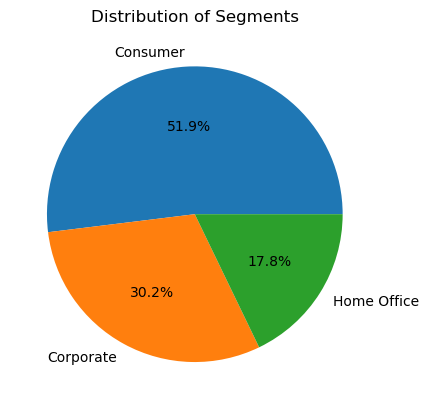

In [37]:
# plot a pie chart showing distribution of Customer Segment
labels = ['Consumer', 'Corporate', 'Home Office']
plt.pie(clean_store_data1['Segment'].value_counts().sort_index(),labels=labels, autopct='%1.1f%%')
plt.title('Distribution of Segments')
plt.show()


Major Segment of Customers are Consumers (51.9%).

##### Distribution of Category


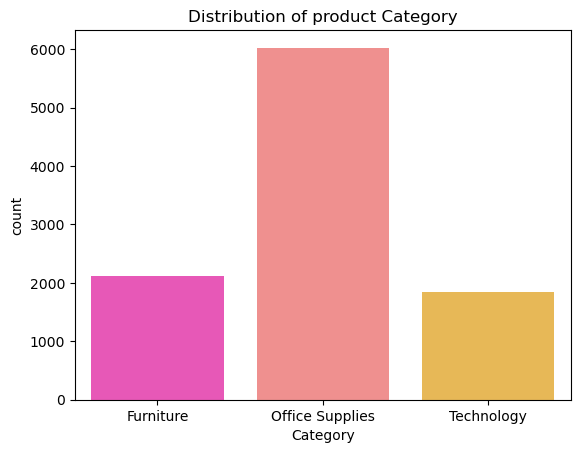

In [38]:
sns.countplot(x=clean_store_data1['Category'], palette="spring")
plt.title('Distribution of product Category')
plt.show()

Most of the Customers order from Office Supplies Category.

##### Distribution of Sub Category


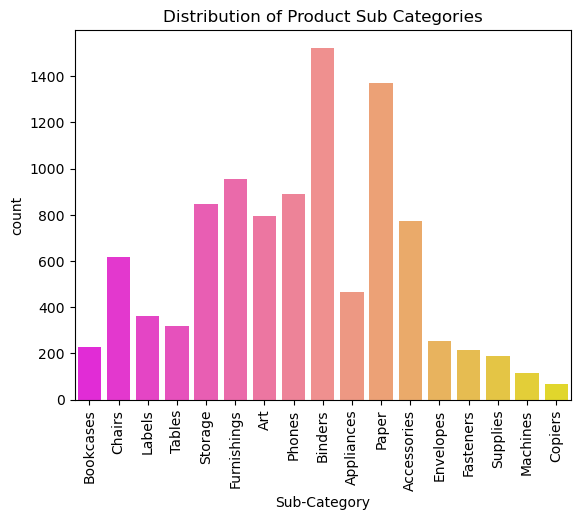

In [39]:
sns.countplot(x=clean_store_data1['Sub-Category'], palette="spring")
plt.title('Distribution of Product Sub Categories')
plt.xticks(rotation=90)
plt.show()

Binders are the most frequently ordered product, followed by paper.

##### Orders by Location

In [40]:
clean_store_data1['Region'].value_counts().sort_values(ascending=False)

West       3203
East       2847
Central    2323
South      1620
Name: Region, dtype: int64

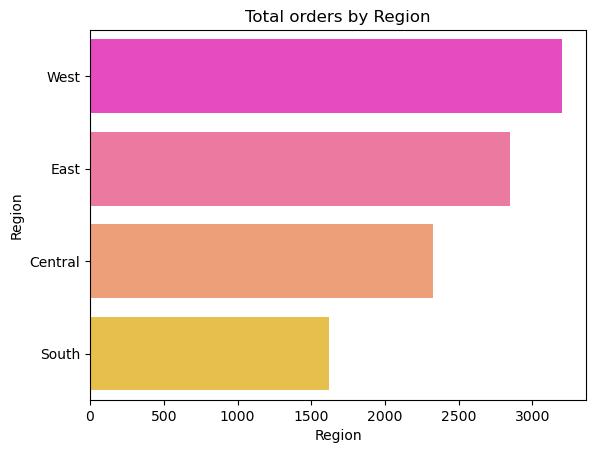

In [41]:
# total orders by Region
sns.barplot(y =clean_store_data1['Region'].value_counts().index, x=clean_store_data1['Region'].value_counts().sort_values(ascending=False),palette="spring")
plt.title('Total orders by Region')
plt.ylabel('Region')
plt.show()

Most orders are from West Region.

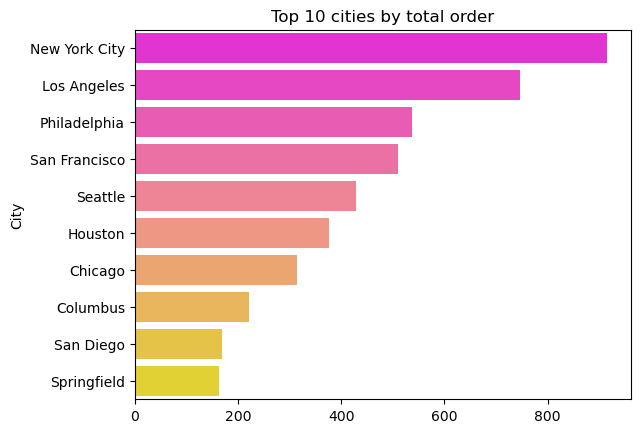

In [42]:
# Top 10 cities by total order
top_cities = clean_store_data1['City'].value_counts().sort_values(ascending=False).head(10)
sns.barplot(x =top_cities.values,y=top_cities.index,palette="spring")
plt.title('Top 10 cities by total order')
plt.ylabel('City')
plt.show()

Most number of orders are from New York City followed by Los Angeles.

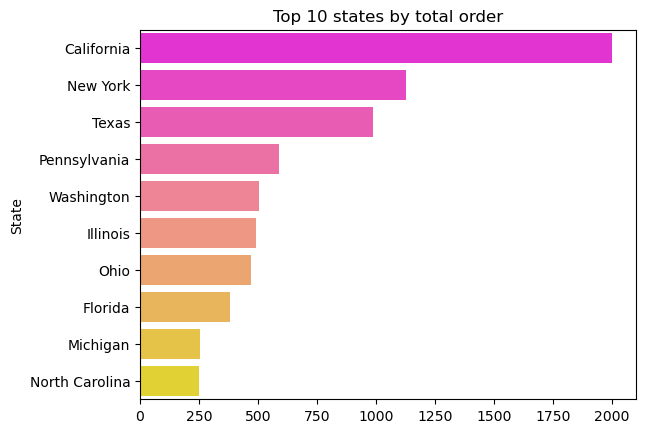

In [43]:
# Top 10 states by total order
top_states = clean_store_data1['State'].value_counts().sort_values(ascending=False).head(10)
sns.barplot(x =top_states.values,y=top_states.index,palette="spring")
plt.title('Top 10 states by total order')
plt.ylabel('State')
plt.show()

California has the most orders of around 2000 , followed by New York around 1250.

#### Bivariate and Mulitivariate Analysis

In [44]:
clean_store_data1.columns

Index(['Order Date', 'Ship Date', 'Ship Mode', 'Segment', 'Country', 'City',
       'State', 'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity',
       'Discount', 'Profit', 'Cost', 'Order Year', 'Order Month', 'Ship Year',
       'Ship Month', 'Order_Week'],
      dtype='object')

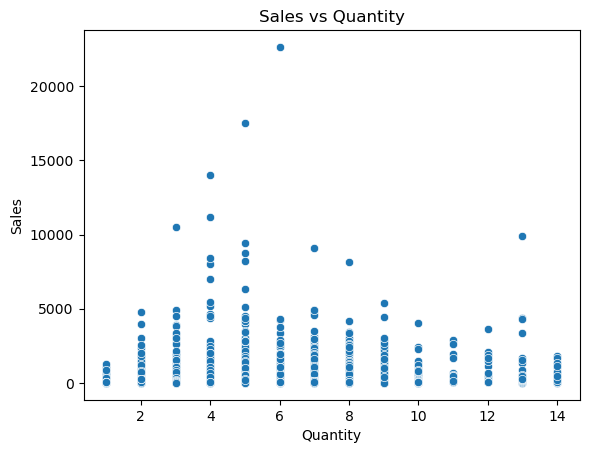

In [45]:
# Sales vs Quantity
sns.scatterplot(y=clean_store_data1['Sales'], x = clean_store_data1['Quantity'])
plt.title('Sales vs Quantity')
plt.show()

Products bought at a quantity below 7 seem to have higher sales.

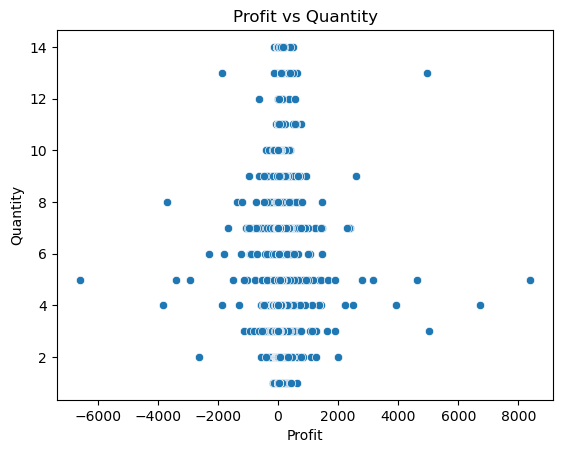

In [46]:
# Profit vs Quantity
sns.scatterplot(x=clean_store_data1['Profit'], y = clean_store_data1['Quantity'])
plt.title('Profit vs Quantity')
plt.show()

Irrespective of the quantity, majority of orders seem to earn very less profit.

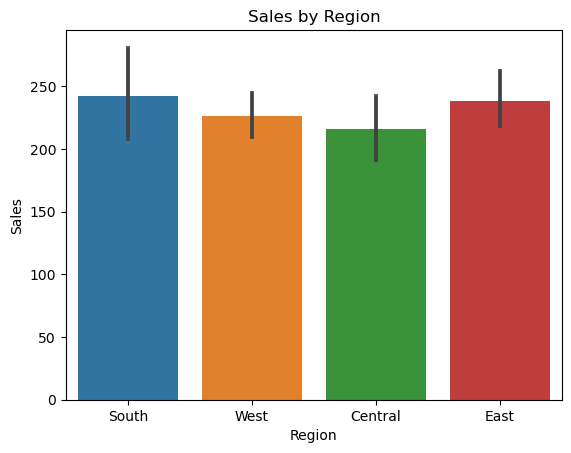

In [47]:
# Sales by Region
sns.barplot(x = clean_store_data1['Region'], y=clean_store_data1['Sales'])
plt.title('Sales by Region')
plt.show()

All the regions have almost equal sales.

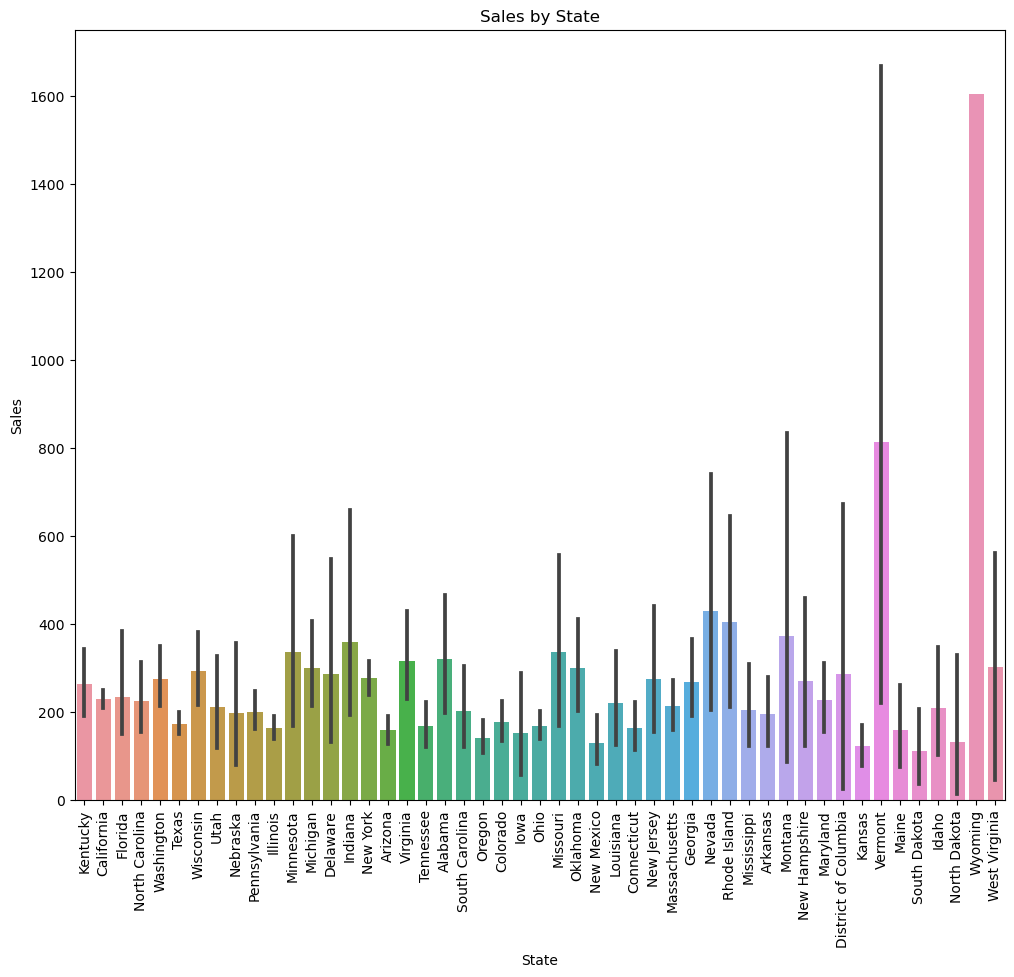

In [48]:
# Sales by State
plt.figure(figsize=(12,10))
sns.barplot(x = clean_store_data1['State'], y=clean_store_data1['Sales'])
plt.xticks(rotation=90)
plt.title('Sales by State')
plt.show()

Wyoming has the most amount of sales, followed by Vermont.

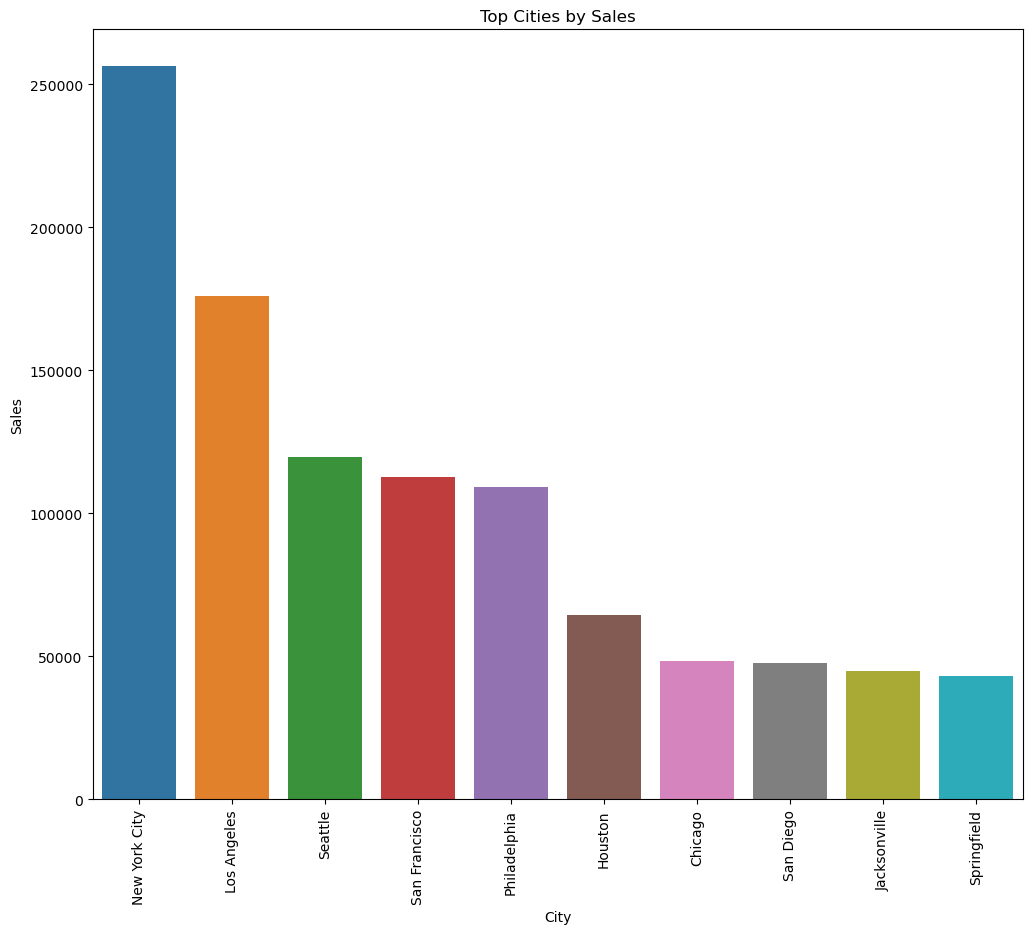

In [49]:
# Sales by City
top_city_sales = clean_store_data1.groupby(['City'])['Sales'].sum().reset_index().sort_values(by='Sales', ascending=False).head(10)

plt.figure(figsize=(12,10))
sns.barplot(x = top_city_sales.City, y=top_city_sales.Sales)
plt.xticks(rotation=90)
plt.title('Top Cities by Sales')
plt.show()

New York City followed by Los Angeles has the highest sales.

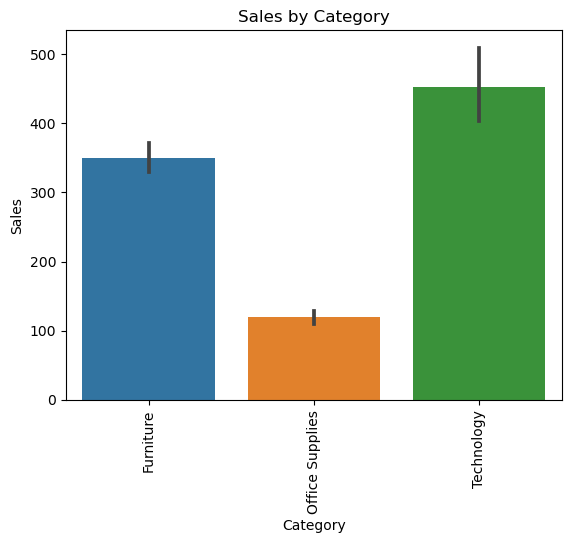

In [50]:
# Sales by Category

sns.barplot(x = clean_store_data1['Category'], y=clean_store_data1['Sales'])
plt.xticks(rotation=90)
plt.title('Sales by Category')
plt.show()


Technology products are making the highest sales.

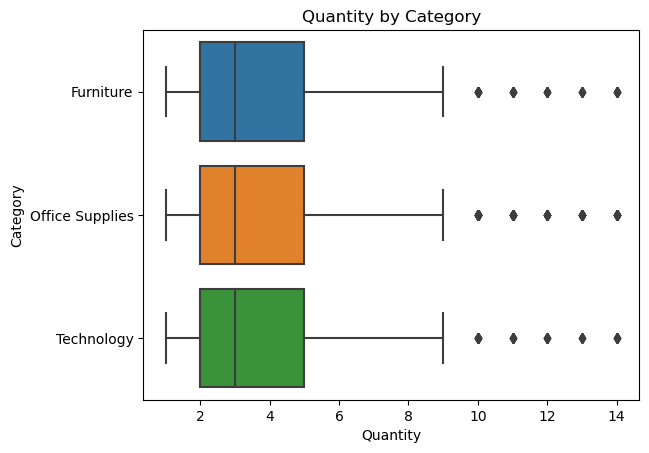

In [51]:
# Quantity by Category

sns.boxplot(y = clean_store_data1['Category'], x=clean_store_data1['Quantity'])
plt.title('Quantity by Category')
plt.show()

Quantity is equally distributed for each Category.

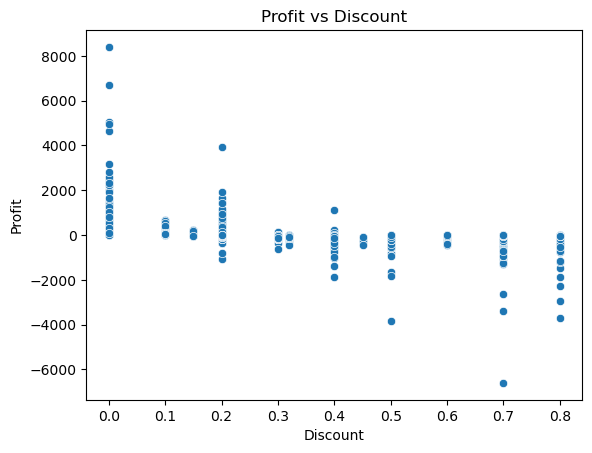

In [52]:
# Profit vs Discount
sns.scatterplot(y=clean_store_data1['Profit'], x = clean_store_data1['Discount'])
plt.title('Profit vs Discount')
plt.show()

Higher the discount, lower the profit.

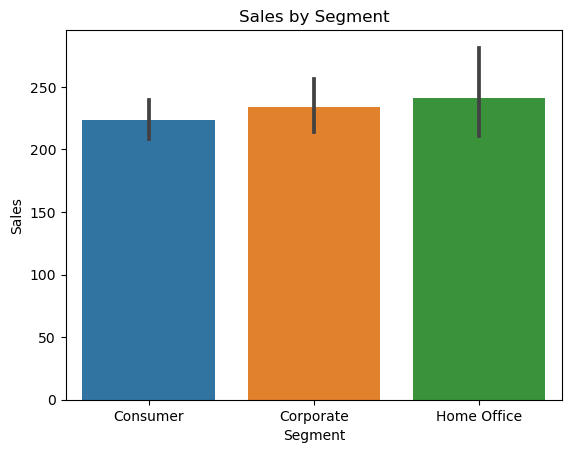

In [53]:
# Sales by Segment
sns.barplot(y = clean_store_data1['Sales'], x=clean_store_data1['Segment'])
plt.title('Sales by Segment')
plt.show()

Sales don't vary much by Segment.

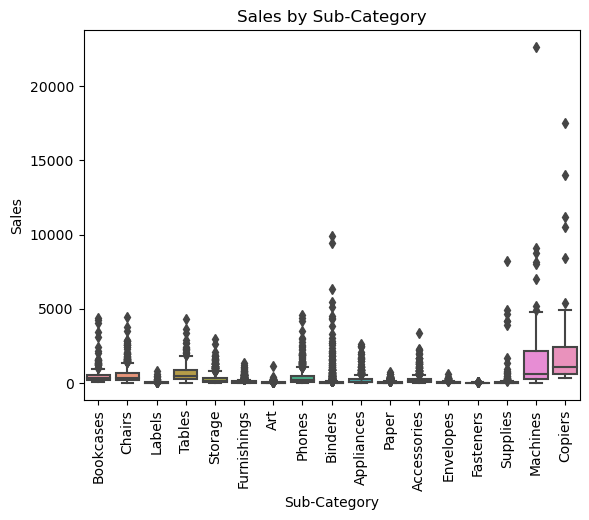

In [54]:
# Sales by Sub-Category
sns.boxplot(y = clean_store_data1['Sales'], x=clean_store_data1['Sub-Category'])
plt.xticks(rotation=90)
plt.title('Sales by Sub-Category')
plt.show()

Copiers followed by machines seem to be making the most sales.

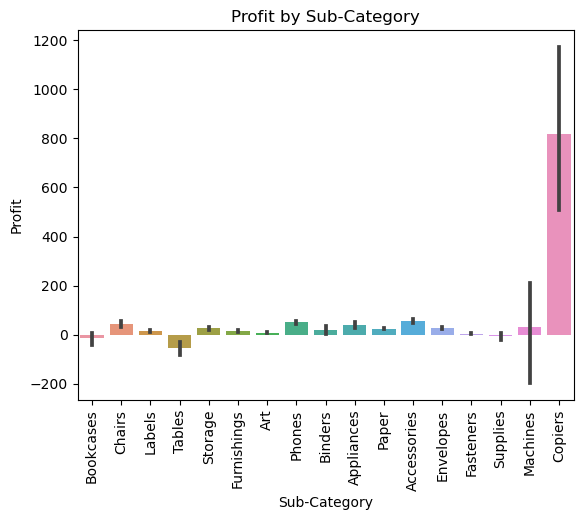

In [55]:
# Profit by Sub-Category
sns.barplot(y = clean_store_data1['Profit'], x=clean_store_data1['Sub-Category'])
plt.xticks(rotation=90)
plt.title('Profit by Sub-Category')
plt.show()

Copiers are making vary large profits. While, tables are causing the most loss.

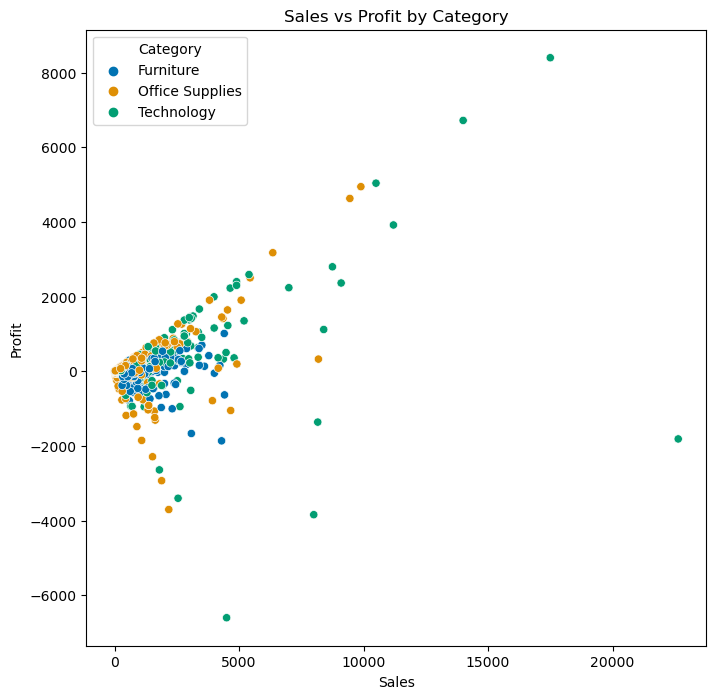

In [56]:
# Sales vs Profit over Category
plt.figure(figsize=(8,8))
sns.scatterplot(x=clean_store_data1['Sales'], y=clean_store_data1['Profit'], hue=clean_store_data1['Category'], palette='colorblind',  sizes=(40,400))
plt.title('Sales vs Profit by Category')
plt.show()

Profit is increasing with Sales for Technology products.

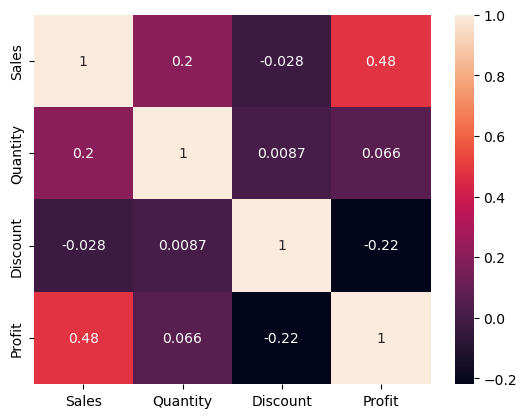

In [57]:
# plot the correlation 
sns.heatmap(clean_store_data1[['Sales', 'Quantity',
       'Discount', 'Profit']].corr(), annot=True)
plt.show()

In [58]:
clean_store_data1.groupby('Sub-Category')['Quantity'].sum()

Sub-Category
Accessories    2976
Appliances     1729
Art            3000
Binders        5974
Bookcases       868
Chairs         2354
Copiers         234
Envelopes       906
Fasteners       914
Furnishings    3563
Labels         1400
Machines        440
Paper          5178
Phones         3289
Storage        3158
Supplies        647
Tables         1241
Name: Quantity, dtype: int64

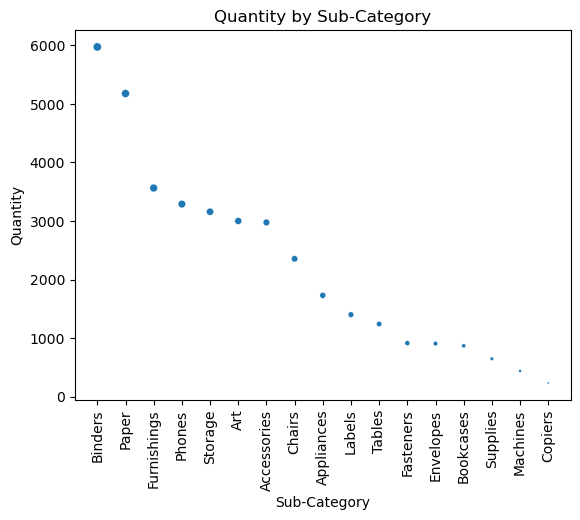

In [59]:
# Quantity by sub-category
grouped_data = clean_store_data1.groupby('Sub-Category')['Quantity'].sum().sort_values(ascending=False)
sns.scatterplot(grouped_data,s=range(34,1,-2))
plt.xticks(rotation=90)
plt.title('Quantity by Sub-Category')
plt.show()

Binders were sold in highest quantity followed by paper.